<a href="https://colab.research.google.com/github/DiltaFebiana/2023-iot-report-TI3G/blob/development/UTS_TI3G_Kelompok3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Dilta febiana <br>
Kelas : TI-3G <br>
Absen : 08**

**Nama : Muhammad Fairuz Zakaria Firdaus <br>
Kelas : TI - 3G <br>
Absen : 14**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
     

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

## Filter Spasial

In [ ]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  #height dan width dari kernel dan citra padding
  paddingheight, paddingwidth = image.shape
  kernelheight, kernelwidth = kernel.shape

  #menentukan output
  outputheight = (paddingheight - kernelheight) // stride + 1
  outputwidth = (paddingwidth - kernelwidth) // stride + 1

  new_image = np.zeros((outputheight, outputwidth)).astype(np.float32)

  for y in range(0, outputheight):
    for x in range(0, outputwidth):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernelheight, x * stride:x * stride + kernelwidth] * kernel).astype(np.float32)
  return new_image 

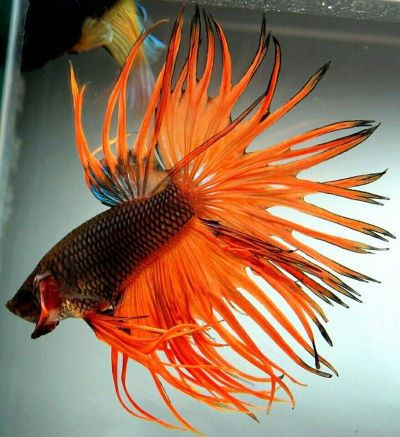

In [ ]:
img = cv.imread('/content/drive/MyDrive/Image/cupang.jpg')
cv2_imshow(img)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

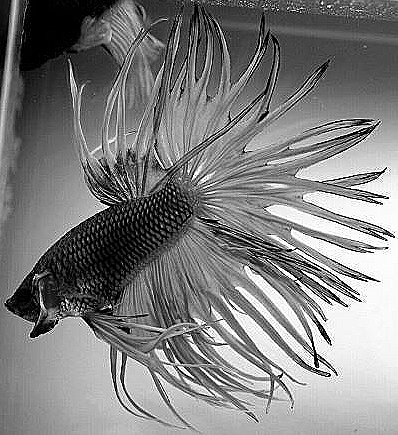

In [ ]:
#SHARPEN

#Sharpen ini merupakan intensitas piksel pusat harus lebih diperkuat pada arah yang berlawanan terhadap tetangganya.
# matriks untuk mendefinisikan filter linier yang diterapkan untuk menyempurnakan tepi, ketajaman, dan kontras
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen,1,0)) 

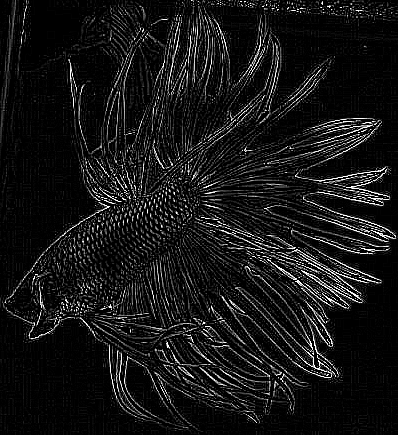

In [ ]:
#Canny Edge Detection
# algoritme untuk mendeteksi tepi pada gambar input apa pun.

cannyedge = np.array([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, cannyedge,1,0))

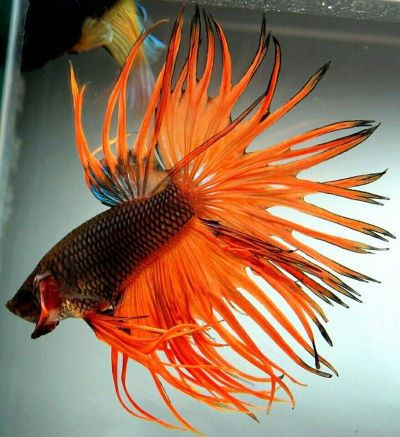

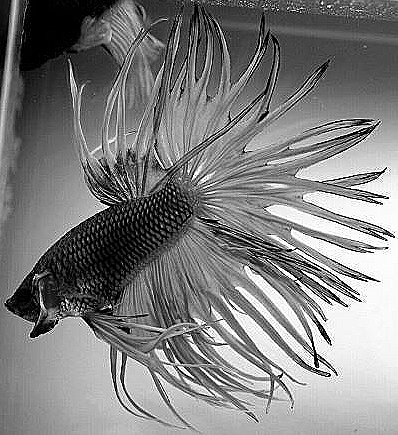

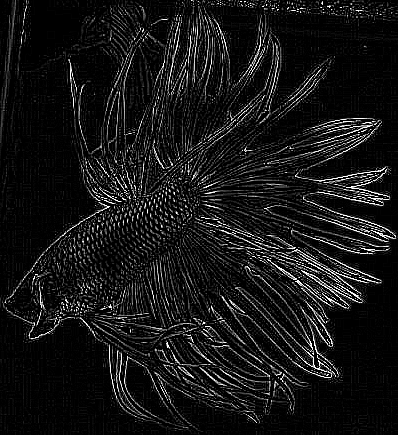

In [ ]:
# Perbandingan antara gambar asli, sharpen, dan juga canny
cv2_imshow(img)
cv2_imshow(convolution2d(img_gray, sharpen,1,0)) 
cv2_imshow(convolution2d(img_gray, cannyedge,1,0))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


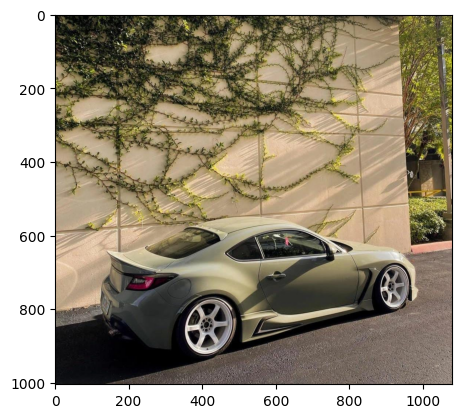

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img_f = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/nsx.jfif')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

 Gamma Correction pada citra 
----------------------------------


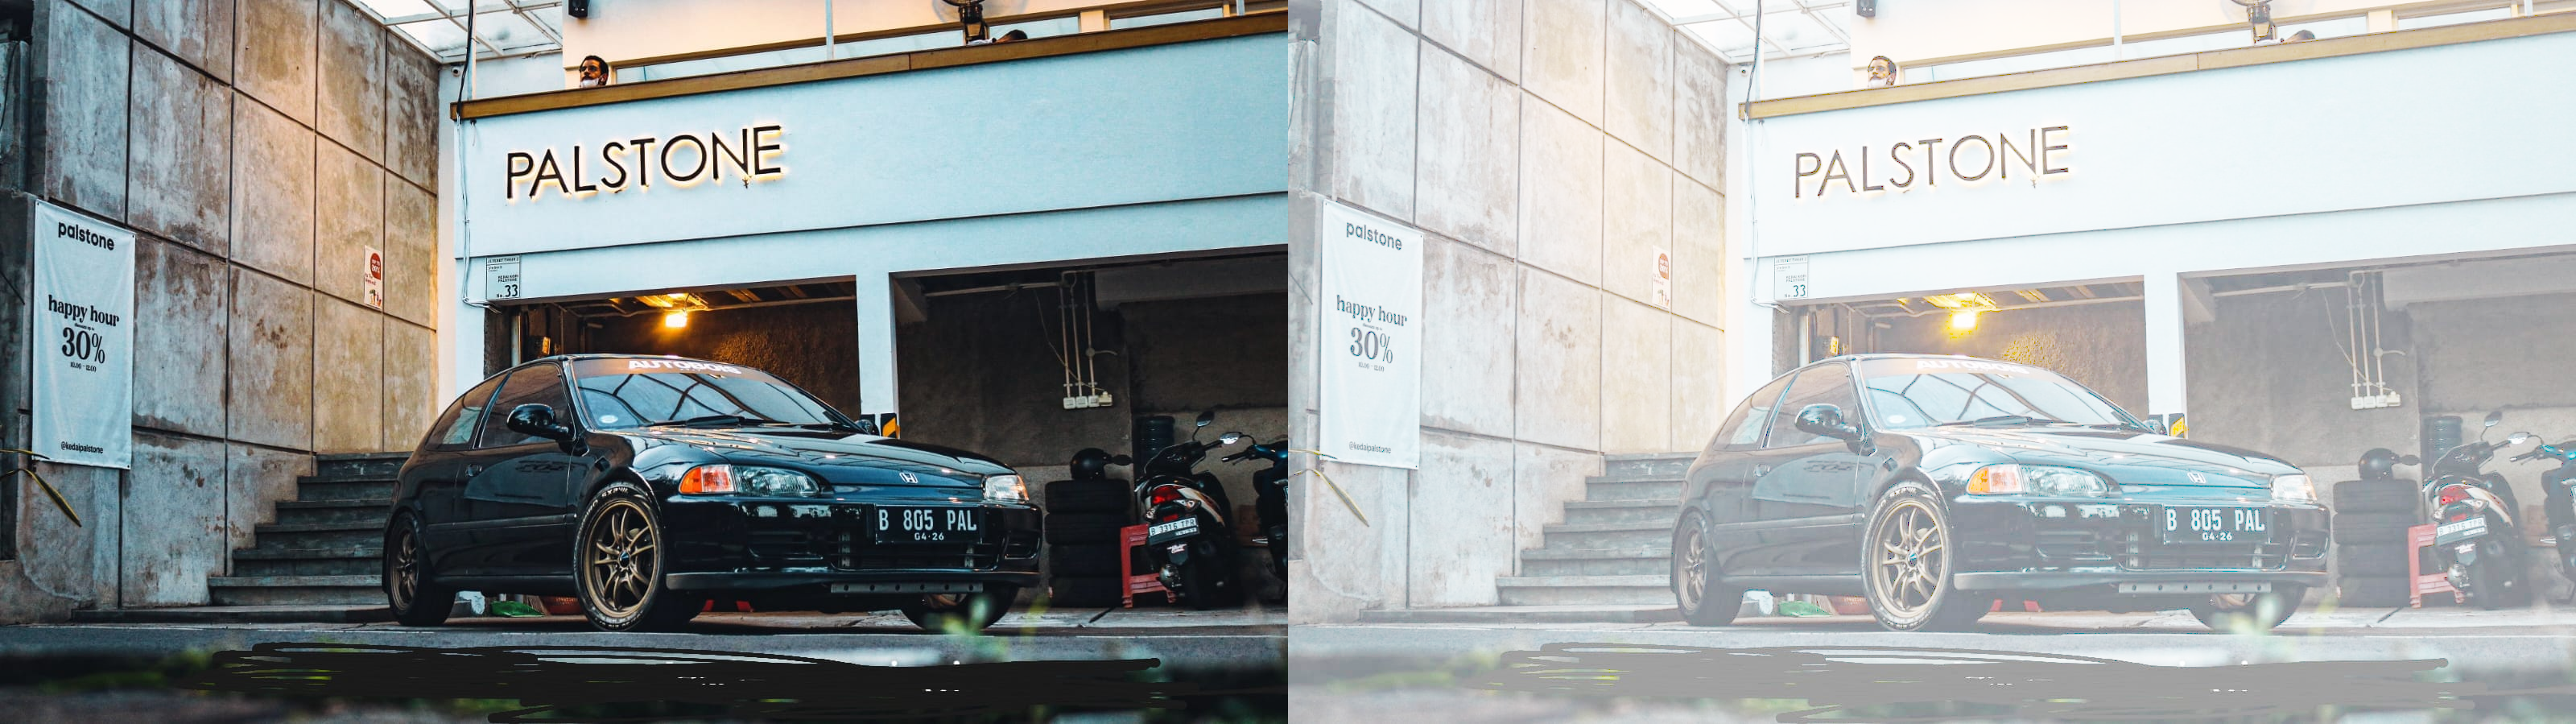

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------


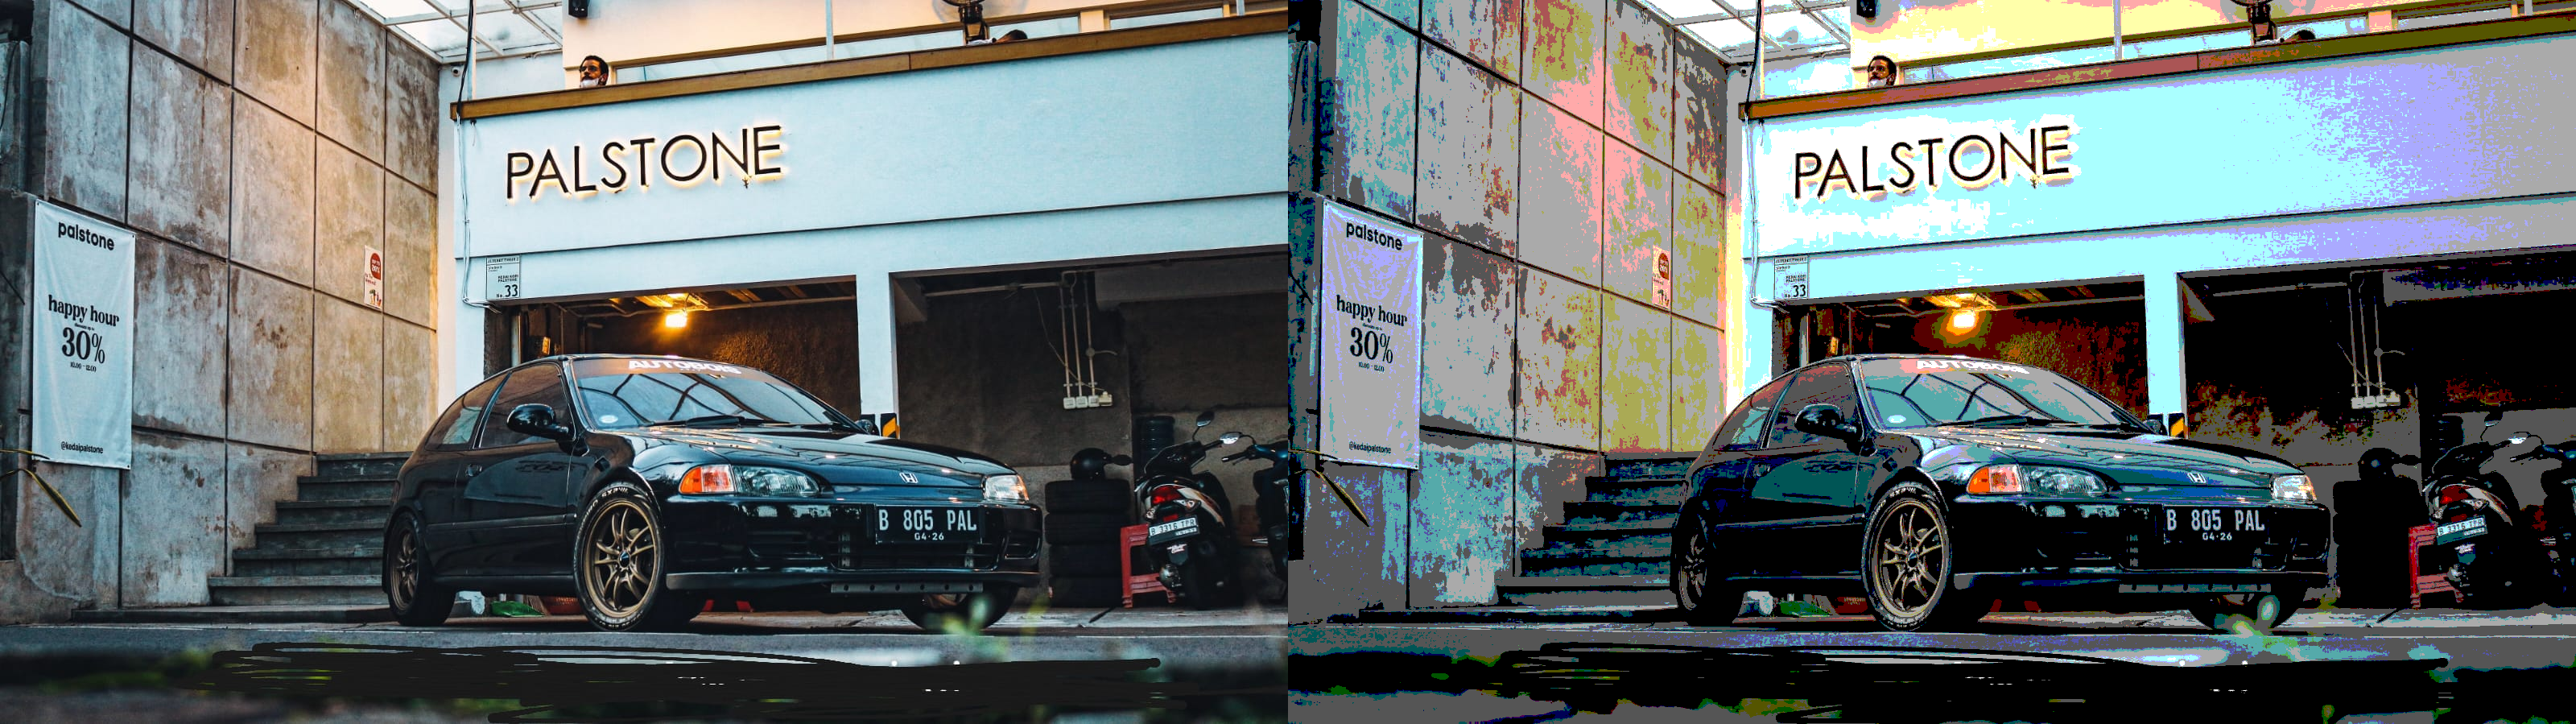

In [ ]:
original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)